# Data Science Aplicada à Área de Saúde

## Prevendo a chance de sobrevivência em paciente que sofre de hepatite

In [ ]:
from IPython.display import Image
Image("imagens/1265.jpg")

A hepatite é a inflamação do fígado. Pode ser causada por vírus ou pelo uso de alguns remédios, álcool e outras drogas, assim como por doenças autoimunes, metabólicas e genéticas. Em alguns casos, são doenças silenciosas que nem sempre apresentam sintomas.

As hepatites virais são inflamações causadas por vírus que são classificados por letras do alfabeto em A, B, C, D (Delta) e E. No Brasil, mais de 70% (23.070) dos óbitos por hepatites virais são decorrentes da Hepatite C, seguido da Hepatite B (21,8%) e A (1,7%). O país registrou 40.198 casos novos de hepatites virais em 2017.  

Quais os sintomas da hepatite A,B e C?

As hepatites são doenças que nem sempre apresentam sintomas, mas, quando estes estão presentes podem ser:

#### Sintomas mais comuns da hepatite A e B:

    Dor ou desconforto abdominal
    Dor muscular
    Fadiga
    Náusea e vômitos
    Perda de apetite
    Febre
    Urina escura
    Amarelamento da pele e olhos
 

#### Sintomas mais comuns da hepatite C:

    Dor ou inchaço abdominal
    Fadiga
    Náusea e vômitos.
    Perda de apetite
    Febre
    Urina escura
    Coceira
    Amarelamento da pele e olhos
    Sangramento no esôfago ou no estômago

#### Como é feito o diagnóstico?

O diagnóstico e o tratamento precoces podem evitar a evolução da doença para cirrose ou câncer de fígado. Por isso, é tão importante fazer os exames. O diagnóstico pode ser feito por testes rápidos que dão o resultado em uma hora. Também existem exames feitos em laboratório.


Fonte: https://www.saude.gov.br/saude-de-a-z/hepatite

## Introdução

Os sintomas são indicadores importantes na avaliação de qualquer doença. As doenças hepáticas tornaram-se uma das causas mais frequente de morte em todo o mundo. Estabelecer um método que nos auxilie em prognósticos precisos na avaliação de pacientes com hepatite ainda é um grande desafio.

O objetivo deste trabalho é analisar um conjunto de dados contendo informações sobre pacientes com hepatite e criar um modelo para prever sua chance de sobrevivência.

Esse conjunto de dados possui 155 linhas, 20 colunas e fornece vários atributos de pacientes que sofrem de hepatite, originalmente doado por G.Gong (Universidade Carnegie-Mellon) via Bojan Cestnik Jozef Stefan Institute em Ljubljana e data de novembro de 1988. Trata-se de um estudo observacional onde foram coletados dados sobre 19 características diferentes e uma classe extra (DIE ou LIVE), dentro de uma faixa etária de pacientes ente 7-78 anos.


Fonte dos dados: https://archive.ics.uci.edu/ml/datasets/hepatitis

1. Title: Hepatitis Domain
2. Sources:
     (a) unknown
     (b) Donor: G.Gong  (Carnegie-Mellon University) via 
                   Bojan Cestnik
                   Jozef Stefan Institute
                   Jamova 39
                   61000 Ljubljana
                   Yugoslavia (tel.: (38)(+61) 214-399 ext.287) }
     (c) Date: November, 1988
3. Past Usage:
    1. Diaconis,P. & Efron,B. (1983).  Computer-Intensive Methods in 
       Statistics.  Scientific American, Volume 248.
       -- Gail Gong reported a 80% classfication accuracy
    2. Cestnik,G., Konenenko,I, & Bratko,I. (1987). Assistant-86: A
       Knowledge-Elicitation Tool for Sophisticated Users.  In I.Bratko
       & N.Lavrac (Eds.) Progress in Machine Learning, 31-45, Sigma Press.
       -- Assistant-86: 83% accuracy
4. Relevant Information:
    Please ask Gail Gong for further information on this database.
5. Number of Instances: 155
6. Number of Attributes: 20 (including the class attribute)
7. Attribute information: 
    Class: DIE, LIVE
    
    AGE: 10, 20, 30, 40, 50, 60, 70, 80
    
    SEX: male, female
    
    STEROID: no, yes
    
    ANTIVIRALS: no, yes
    
    FATIGUE: no, yes
    
    MALAISE: no, yes
    
    ANOREXIA: no, yes
    
    LIVER BIG: no, yes
    
    LIVER FIRM: no, yes
    
    SPLEEN PALPABLE: no, yes
    
    SPIDERS: no, yes
    
    ASCITES: no, yes
    
    VARICES: no, yes
    
    BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00
    
        -- see the note below
        
    ALK PHOSPHATE: 33, 80, 120, 160, 200, 250
    
    SGOT: 13, 100, 200, 300, 400, 500,
    
    ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0
    
    PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90
    
    HISTOLOGY: no, yes
    

The BILIRUBIN attribute appears to be continuously-valued.  I checked
this with the donater, Bojan Cestnik, who replied:

      About the hepatitis database and BILIRUBIN problem I would like to say
      the following: BILIRUBIN is continuous attribute (= the number of it's
      "values" in the ASDOHEPA.DAT file is negative!!!); "values" are quoted
      because when speaking about the continuous attribute there is no such 
      thing as all possible values. However, they represent so called
      "boundary" values; according to these "boundary" values the attribute
      can be discretized. At the same time, because of the continious
      attribute, one can perform some other test since the continuous
      information is preserved. I hope that these lines have at least roughly 
      answered your question. 
9. Class Distribution:
     DIE: 32
    LIVE: 123


In [1]:
# Carregando os pacotes
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.experimental import enable_iterative_imputer 
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc, precision_score, recall_score, roc_auc_score 
from sklearn.impute import IterativeImputer
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.__version__

'1.0.4'

In [3]:
np.__version__

'1.16.2'

## Carregando os Dados

In [4]:
nome_colunas = ['Class', 'Age','Gender', 'Steroid', 'Antivirals','Fatigue','Malaise','Anorexia','LiverBig',
                'LiverFirm','SpleenPalpable','Spiders','Ascites','Varices','Bilirubin','AlkPhosphate','SGOT',
                'Albumin','Protime','Histology']

In [5]:
dados_hepatite = pd.read_csv('dados/hepatite.data', 
                             names = nome_colunas, 
                             sep = ',', 
                             encoding = 'latin-1')

## Análise Exploratória

In [6]:
dados_hepatite.head(20)

,Class,Age,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
6,1,51,1,1,2,1,2,1,2,2,1,1,2,2,?,?,?,?,?,1
7,2,23,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,?,?,?,1
8,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.70,?,48,4.4,?,1
9,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,120,3.9,?,1


In [7]:
dados_hepatite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class           155 non-null    int64 
 1   Age             155 non-null    int64 
 2   Gender          155 non-null    int64 
 3   Steroid         155 non-null    object
 4   Antivirals      155 non-null    int64 
 5   Fatigue         155 non-null    object
 6   Malaise         155 non-null    object
 7   Anorexia        155 non-null    object
 8   LiverBig        155 non-null    object
 9   LiverFirm       155 non-null    object
 10  SpleenPalpable  155 non-null    object
 11  Spiders         155 non-null    object
 12  Ascites         155 non-null    object
 13  Varices         155 non-null    object
 14  Bilirubin       155 non-null    object
 15  AlkPhosphate    155 non-null    object
 16  SGOT            155 non-null    object
 17  Albumin         155 non-null    object
 18  Protime   

In [8]:
# Formato dos dados
dados_hepatite.shape

(155, 20)

In [9]:
dados_hepatite['Class'].value_counts()

2    123
1     32
Name: Class, dtype: int64

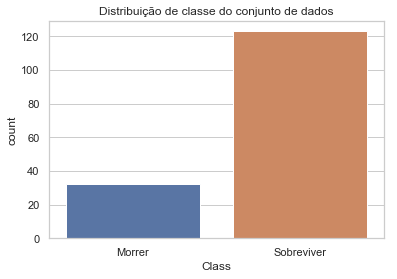

In [10]:
sns.set(style="whitegrid")

#Usando um gráfico de barras para mostrar a distribuição das classes: Morrer e Sobreviver
bp = sns.countplot(x=dados_hepatite['Class'])
plt.title("Distribuição de classe do conjunto de dados")
bp.set_xticklabels(["Morrer","Sobreviver"])
plt.show()

### Calcular a prevalência da classe positiva

A prevalência é a porcentagem de suas amostras que tem a característica que você está tentando prever. No cenário em questão, significa que as pessoas que têm chance de sobreviver são positivas, enquanto as que foram a óbito são as negativas. A taxa é calculada por (número de amostras positivas / número de amostras). Portanto, uma taxa de prevalência de 0,2 significa que 20% de nossa amostra está tendo uma convulsão naquele momento.

In [11]:
# Esta função calcula a prevalência da classe positiva (label = 2)
def calcula_prevalencia(y_actual):
    return sum(y_actual) / len(y_actual)


print("Prevalência da classe positiva: %.3f"% calcula_prevalencia(dados_hepatite["Class"].values==2))

Prevalência da classe positiva: 0.794


In [12]:
len(dados_hepatite["Class"].values==2)

155

In [13]:
# Coletando estatísticas das colunas
dados_hepatite.describe()

,Class,Age,Gender,Antivirals,Histology
count,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.845161,1.451613
std,0.406070,12.565878,0.305240,0.362923,0.499266
min,1.000000,7.000000,1.000000,1.000000,1.000000
25%,2.000000,32.000000,1.000000,2.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000


In [14]:
# funcao para avaliar distribuição dos dados missings em cada atributo
def checa_missing(df):
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            print(col, df[col].isnull().sum())

In [15]:
# função para Avaliar a distribuição dos dados em cada atributo
def checa_distribuicao(df):
    for col in df.columns:
        if df[col].dtype == object:
            print(df.groupby([col])[col].count())
            print('')

In [16]:
checa_distribuicao(dados_hepatite)

Steroid
1    76
2    78
?     1
Name: Steroid, dtype: int64

Fatigue
1    100
2     54
?      1
Name: Fatigue, dtype: int64

Malaise
1    61
2    93
?     1
Name: Malaise, dtype: int64

Anorexia
1     32
2    122
?      1
Name: Anorexia, dtype: int64

LiverBig
1     25
2    120
?     10
Name: LiverBig, dtype: int64

LiverFirm
1    60
2    84
?    11
Name: LiverFirm, dtype: int64

SpleenPalpable
1     30
2    120
?      5
Name: SpleenPalpable, dtype: int64

Spiders
1    51
2    99
?     5
Name: Spiders, dtype: int64

Ascites
1     20
2    130
?      5
Name: Ascites, dtype: int64

Varices
1     18
2    132
?      5
Name: Varices, dtype: int64

Bilirubin
0.30     1
0.40     2
0.50     2
0.60    10
0.70    23
0.80    10
0.90    13
1.00    29
1.10     1
1.20     8
1.30     6
1.40     2
1.50     7
1.60     3
1.70     3
1.80     1
1.90     1
2.00     4
2.20     1
2.30     3
2.40     1
2.50     1
2.80     2
2.90     1
3.00     1
3.20     2
3.50     1
3.90     1
4.10     1
4.20     1
4.60     4

## Tratamento de Valores Ausentes

Possuimos um volume bem reduzido de dados, apenas 155 linhas, porem possuimos 15 colunas com valores missings, representado pelo valor '?', sendo assim analisarei estas 15 colunas para avalirar que estratégia usarei para ter o mínimo de perda de informação.

Primeiramente tratarei as variáveis com valores binários: Gender, Steroid, Fatigue, Malaise, Anorexia, LiverBig, LiverFirm, SpleenPalpable, Spiders, Ascites, Varices e Histology

In [17]:
# Convertendo as variáveis 'Gender', 'Antivirals' e 'Histology' do tipo numeric para object
dados_hepatite['Gender'] = dados_hepatite['Gender'].astype('object')
dados_hepatite['Antivirals'] = dados_hepatite['Antivirals'].astype('object')
dados_hepatite['Histology'] = dados_hepatite['Histology'].astype('object')

In [18]:
# Extraindo variáveis do tipo categóricas
dfcatname = dados_hepatite.dtypes[dados_hepatite.dtypes == 'object'].index
dfcatname

Index(['Gender', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia',
       'LiverBig', 'LiverFirm', 'SpleenPalpable', 'Spiders', 'Ascites',
       'Varices', 'Bilirubin', 'AlkPhosphate', 'SGOT', 'Albumin', 'Protime',
       'Histology'],
      dtype='object')

In [19]:
# Descrevendo as variáveis categóricas
dados_hepatite[dfcatname].describe()

,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,Histology
count,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155
unique,2,3,2,3,3,3,3,3,3,3,3,3,35,84,85,30,45,2
top,1,2,2,1,2,2,2,2,2,2,2,2,1.00,?,20,4.0,?,1
freq,139,78,131,100,93,122,120,84,120,99,130,132,29,29,7,25,67,85


In [20]:
df_hepatite = dados_hepatite

Alterando o valores missings das variáveis categóricas Gender, Steroid, Fatigue, Malaise, Anorexia, LiverBig, LiverFirm, SpleenPalpable, Spiders, Ascites, Varices e Histology de '?' para NaN 

In [21]:
for col in dfcatname:
    if df_hepatite[col].isin(['?']).any():
        df_hepatite[col] = df_hepatite.apply(lambda row: np.nan if (row[col] == '?') else row[col], axis=1)

In [22]:
# Convertendo as variáveis 'Bilirubin','AlkPhosphate','SGOT','Albumin' e 'Protime' do tipo object para numeric

df_hepatite['Bilirubin'] = pd.to_numeric(df_hepatite['Bilirubin'])
df_hepatite['AlkPhosphate'] = pd.to_numeric(df_hepatite['AlkPhosphate'])
df_hepatite['SGOT'] = pd.to_numeric(df_hepatite['SGOT'])
df_hepatite['Albumin'] = pd.to_numeric(df_hepatite['Albumin'])
df_hepatite['Protime'] = pd.to_numeric(df_hepatite['Protime'])

In [23]:
df_hepatite.head(10)

,Class,Age,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2,2,2,2,2,2,2,2,2,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,NaN,200.0,4.0,NaN,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95.0,28.0,4.0,75.0,1
6,1,51,1,1,2,1,2,1,2,2,1,1,2,2,NaN,NaN,NaN,NaN,NaN,1
7,2,23,1,2,2,2,2,2,2,2,2,2,2,2,1.0,NaN,NaN,NaN,NaN,1
8,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.7,NaN,48.0,4.4,NaN,1
9,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.0,NaN,120.0,3.9,NaN,1


In [24]:
df_hepatite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Class           155 non-null    int64  
 1   Age             155 non-null    int64  
 2   Gender          155 non-null    object 
 3   Steroid         154 non-null    object 
 4   Antivirals      155 non-null    object 
 5   Fatigue         154 non-null    object 
 6   Malaise         154 non-null    object 
 7   Anorexia        154 non-null    object 
 8   LiverBig        145 non-null    object 
 9   LiverFirm       144 non-null    object 
 10  SpleenPalpable  150 non-null    object 
 11  Spiders         150 non-null    object 
 12  Ascites         150 non-null    object 
 13  Varices         150 non-null    object 
 14  Bilirubin       149 non-null    float64
 15  AlkPhosphate    126 non-null    float64
 16  SGOT            151 non-null    float64
 17  Albumin         139 non-null    flo

In [25]:
# Extraindo variáveis do tipo categóricas
dfcatname = df_hepatite.dtypes[df_hepatite.dtypes == 'object'].index
dfcatname

Index(['Gender', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia',
       'LiverBig', 'LiverFirm', 'SpleenPalpable', 'Spiders', 'Ascites',
       'Varices', 'Histology'],
      dtype='object')

In [26]:
df_hepatite[dfcatname]

,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Histology
0,2,1,2,2,2,2,1,2,2,2,2,2,1
1,1,1,2,1,2,2,1,2,2,2,2,2,1
2,1,2,2,1,2,2,2,2,2,2,2,2,1
3,1,NaN,1,2,2,2,2,2,2,2,2,2,1
4,1,2,2,2,2,2,2,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,2,2,1,1,1,2,2,2,1,1,1,2
151,1,2,2,1,2,2,2,1,2,2,2,2,2
152,1,1,2,1,1,2,1,1,2,1,2,2,2
153,2,1,2,1,2,2,2,2,1,1,2,1,2


In [27]:
# Imputando recursos multivariados para os valores missings das variáveis categoricas, utilizando como estimador a regressão baseada em k-vizinhos mais próximos
X = df_hepatite[dfcatname].values
imp = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=5), max_iter=100, 
                       imputation_order='random', initial_strategy='median', random_state=42)
imp.fit(X)
X = imp.transform(X)

In [28]:
columns = df_hepatite[dfcatname].columns
indexs  = df_hepatite[dfcatname].index
df_hepatite_imput_cat = pd.DataFrame(X, columns=columns, index=indexs)

In [29]:
df_hepatite_imput_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          155 non-null    float64
 1   Steroid         155 non-null    float64
 2   Antivirals      155 non-null    float64
 3   Fatigue         155 non-null    float64
 4   Malaise         155 non-null    float64
 5   Anorexia        155 non-null    float64
 6   LiverBig        155 non-null    float64
 7   LiverFirm       155 non-null    float64
 8   SpleenPalpable  155 non-null    float64
 9   Spiders         155 non-null    float64
 10  Ascites         155 non-null    float64
 11  Varices         155 non-null    float64
 12  Histology       155 non-null    float64
dtypes: float64(13)
memory usage: 15.9 KB


In [30]:
# atribuindo os valores inputados 
df_hepatite[dfcatname] = df_hepatite_imput_cat.round(0).astype('object')

### Avaliando diferentes estimadores para imputação de dados nas colunas numericas que possuem dados missings

O objetivo é comparar diferentes estimadores para ver o que melhor se adequa ao conjunto de dados de Pacientes com Hepatite

In [31]:
# Extraindo variáveis do tipo numérica
dfnumname = df_hepatite.dtypes[df_hepatite.dtypes == 'float64'].index
dfnumname

Index(['Bilirubin', 'AlkPhosphate', 'SGOT', 'Albumin', 'Protime'], dtype='object')

In [32]:
# Eliminando os registros que não possuem algum tipo de exames que identificam problemas no fígado
selRows = df_hepatite[(df_hepatite['Protime'].isna()) & (df_hepatite['Albumin'].isna()) & (df_hepatite['SGOT'].isna()) & (df_hepatite['AlkPhosphate'].isna()) & (df_hepatite['Bilirubin'].isna())].index
df_hepatite = df_hepatite.drop(selRows, axis=0)

In [33]:
# Excluindo a linhas que possuem algum tipo de valor nulo
NullRows = df_hepatite[df_hepatite.isnull().any(axis=1)].index
df_full = df_hepatite.drop(NullRows, axis=0)

In [34]:
print(df_hepatite[df_hepatite.isnull().any(axis=1)].index)

Int64Index([  0,   1,   2,   4,   7,   8,   9,  14,  16,  26,  31,  35,  37,
             41,  44,  45,  46,  50,  51,  55,  59,  65,  66,  67,  69,  70,
             71,  72,  73,  74,  76,  79,  80,  83,  86,  87,  88,  91,  92,
             93,  97,  99, 101, 105, 106, 107, 110, 112, 113, 114, 115, 116,
            119, 120, 122, 123, 126, 131, 132, 136, 140, 142, 144, 146, 148,
            149, 150, 151, 152],
           dtype='int64')


In [35]:
df_full['Class'].value_counts()

2    68
1    15
Name: Class, dtype: int64

In [36]:
X_full = df_full[dfnumname].values
y_full = df_full['Class'].values
X_missing = df_hepatite[dfnumname].values
y_missing = df_hepatite['Class'].values

In [37]:
br_estimator = BayesianRidge()
N_SPLITS = 5

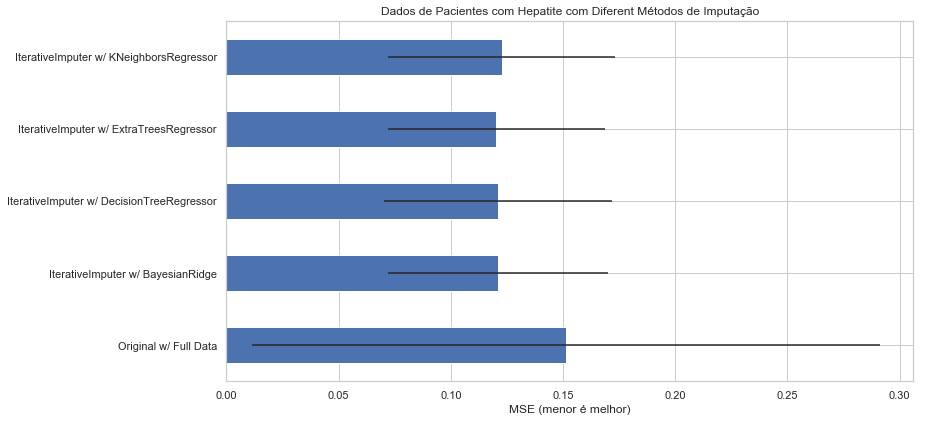

In [38]:
score_full_data = pd.DataFrame(
    cross_val_score(
        br_estimator, X_full, y_full, scoring='neg_mean_squared_error',
        cv=N_SPLITS
    ),
    columns=['Full Data']
)



# Estimate the score after iterative imputation of the missing values
# with different estimators
estimators = [
    BayesianRidge(),
    DecisionTreeRegressor(max_features='log2', random_state=42),
    ExtraTreesRegressor(n_estimators=10, random_state=42),
    KNeighborsRegressor(n_neighbors=5)
]
score_iterative_imputer = pd.DataFrame()
for impute_estimator in estimators:
    estimator = make_pipeline(
        IterativeImputer(max_iter=500, random_state=23, estimator=impute_estimator),
        br_estimator
    )
    score_iterative_imputer[impute_estimator.__class__.__name__] = \
        cross_val_score(
            estimator, X_missing, y_missing, scoring='neg_mean_squared_error',
            cv=N_SPLITS
        )

scores = pd.concat(
    [score_full_data, score_iterative_imputer],
    keys=['Original', 'IterativeImputer'], axis=1
)

# Visualiando o resultado
fig, ax = plt.subplots(figsize=(13, 6))
means = -scores.mean()
errors = scores.std()
means.plot.barh(xerr=errors, ax=ax)
ax.set_title('Dados de Pacientes com Hepatite com Diferent Métodos de Imputação')
ax.set_xlabel('MSE (menor é melhor)')
ax.set_yticks(np.arange(means.shape[0]))
ax.set_yticklabels([" w/ ".join(label) for label in means.index.tolist()])
plt.tight_layout(pad=1)
plt.show()

In [39]:
# Para esse conjunto de dadoso melhor estimador foi DecisionTreeRegressor

X = df_hepatite[dfnumname].values
imp = IterativeImputer(estimator=DecisionTreeRegressor(max_features='sqrt', random_state=42), max_iter=500, random_state=23)
imp.fit(X)
X = imp.transform(X)

In [40]:
columns = df_hepatite[dfnumname].columns
indexs  = df_hepatite[dfnumname].index
df_hepatite_imput_num = pd.DataFrame(X, columns=columns, index=indexs)

In [41]:
# atribuindo os valores inputados 
df_hepatite[dfnumname] = df_hepatite_imput_num

In [42]:
df_hepatite.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 154
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Class           152 non-null    int64  
 1   Age             152 non-null    int64  
 2   Gender          152 non-null    object 
 3   Steroid         152 non-null    object 
 4   Antivirals      152 non-null    object 
 5   Fatigue         152 non-null    object 
 6   Malaise         152 non-null    object 
 7   Anorexia        152 non-null    object 
 8   LiverBig        152 non-null    object 
 9   LiverFirm       152 non-null    object 
 10  SpleenPalpable  152 non-null    object 
 11  Spiders         152 non-null    object 
 12  Ascites         152 non-null    object 
 13  Varices         152 non-null    object 
 14  Bilirubin       152 non-null    float64
 15  AlkPhosphate    152 non-null    float64
 16  SGOT            152 non-null    float64
 17  Albumin         152 non-null    flo

### Aplicando transformação nos dados

In [43]:
# Aplicando One-Hot Encoding nas colunas categorias. 
dataset_novos_dados = pd.get_dummies(df_hepatite[dfcatname], columns = dfcatname, prefix = dfcatname)

In [44]:
dataset_novos_dados

,Gender_1.0,Gender_2.0,Steroid_1.0,Steroid_2.0,Antivirals_1.0,Antivirals_2.0,Fatigue_1.0,Fatigue_2.0,Malaise_1.0,Malaise_2.0,...,SpleenPalpable_1.0,SpleenPalpable_2.0,Spiders_1.0,Spiders_2.0,Ascites_1.0,Ascites_2.0,Varices_1.0,Varices_2.0,Histology_1.0,Histology_2.0
0,0,1,1,0,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,1,0
1,1,0,1,0,0,1,1,0,0,1,...,0,1,0,1,0,1,0,1,1,0
2,1,0,0,1,0,1,1,0,0,1,...,0,1,0,1,0,1,0,1,1,0
3,1,0,0,1,1,0,0,1,0,1,...,0,1,0,1,0,1,0,1,1,0
4,1,0,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,0,0,1,0,1,1,0,1,0,...,0,1,1,0,1,0,1,0,0,1
151,1,0,0,1,0,1,1,0,0,1,...,0,1,0,1,0,1,0,1,0,1
152,1,0,1,0,0,1,1,0,1,0,...,0,1,1,0,0,1,0,1,0,1
153,0,1,1,0,0,1,1,0,0,1,...,1,0,1,0,0,1,1,0,0,1


In [45]:
dataset_novos_dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 154
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Gender_1.0          152 non-null    uint8
 1   Gender_2.0          152 non-null    uint8
 2   Steroid_1.0         152 non-null    uint8
 3   Steroid_2.0         152 non-null    uint8
 4   Antivirals_1.0      152 non-null    uint8
 5   Antivirals_2.0      152 non-null    uint8
 6   Fatigue_1.0         152 non-null    uint8
 7   Fatigue_2.0         152 non-null    uint8
 8   Malaise_1.0         152 non-null    uint8
 9   Malaise_2.0         152 non-null    uint8
 10  Anorexia_1.0        152 non-null    uint8
 11  Anorexia_2.0        152 non-null    uint8
 12  LiverBig_1.0        152 non-null    uint8
 13  LiverBig_2.0        152 non-null    uint8
 14  LiverFirm_1.0       152 non-null    uint8
 15  LiverFirm_2.0       152 non-null    uint8
 16  SpleenPalpable_1.0  152 non-null    uint8
 1

In [46]:
dfcatname_novo = dataset_novos_dados.columns
dfcatname_novo

Index(['Gender_1.0', 'Gender_2.0', 'Steroid_1.0', 'Steroid_2.0',
       'Antivirals_1.0', 'Antivirals_2.0', 'Fatigue_1.0', 'Fatigue_2.0',
       'Malaise_1.0', 'Malaise_2.0', 'Anorexia_1.0', 'Anorexia_2.0',
       'LiverBig_1.0', 'LiverBig_2.0', 'LiverFirm_1.0', 'LiverFirm_2.0',
       'SpleenPalpable_1.0', 'SpleenPalpable_2.0', 'Spiders_1.0',
       'Spiders_2.0', 'Ascites_1.0', 'Ascites_2.0', 'Varices_1.0',
       'Varices_2.0', 'Histology_1.0', 'Histology_2.0'],
      dtype='object')

In [47]:
df_hepatite_novo = df_hepatite.merge(dataset_novos_dados, left_index=True, right_index=True)

In [48]:
df_hepatite_novo.head(10)

,Class,Age,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,...,SpleenPalpable_1.0,SpleenPalpable_2.0,Spiders_1.0,Spiders_2.0,Ascites_1.0,Ascites_2.0,Varices_1.0,Varices_2.0,Histology_1.0,Histology_2.0
0,2,30,2,1,2,2,2,2,1,2,...,0,1,0,1,0,1,0,1,1,0
1,2,50,1,1,2,1,2,2,1,2,...,0,1,0,1,0,1,0,1,1,0
2,2,78,1,2,2,1,2,2,2,2,...,0,1,0,1,0,1,0,1,1,0
3,2,31,1,2,1,2,2,2,2,2,...,0,1,0,1,0,1,0,1,1,0
4,2,34,1,2,2,2,2,2,2,2,...,0,1,0,1,0,1,0,1,1,0
5,2,34,1,2,2,2,2,2,2,2,...,0,1,0,1,0,1,0,1,1,0
7,2,23,1,2,2,2,2,2,2,2,...,0,1,0,1,0,1,0,1,1,0
8,2,39,1,2,2,1,2,2,2,1,...,0,1,0,1,0,1,0,1,1,0
9,2,30,1,2,2,2,2,2,2,2,...,0,1,0,1,0,1,0,1,1,0
10,2,39,1,1,1,2,2,2,1,1,...,0,1,0,1,0,1,0,1,1,0


In [49]:
# Eliminando as colunas categoricas originas
for col in dfcatname:
    del df_hepatite_novo[col]

In [50]:
df_hepatite_novo["Class"].replace((1,2),(0,1),inplace=True)

In [51]:
df_hepatite_novo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 154
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Class               152 non-null    int64  
 1   Age                 152 non-null    int64  
 2   Bilirubin           152 non-null    float64
 3   AlkPhosphate        152 non-null    float64
 4   SGOT                152 non-null    float64
 5   Albumin             152 non-null    float64
 6   Protime             152 non-null    float64
 7   Gender_1.0          152 non-null    uint8  
 8   Gender_2.0          152 non-null    uint8  
 9   Steroid_1.0         152 non-null    uint8  
 10  Steroid_2.0         152 non-null    uint8  
 11  Antivirals_1.0      152 non-null    uint8  
 12  Antivirals_2.0      152 non-null    uint8  
 13  Fatigue_1.0         152 non-null    uint8  
 14  Fatigue_2.0         152 non-null    uint8  
 15  Malaise_1.0         152 non-null    uint8  
 16  Malaise_

Analisando as variáveis Bilirubin, AlkPhosphate,SGOT,Albumin e Protime

## Explorando os principais indicadores

O exame de bilirrubina serve para avaliar o funcionamento do fígado e da vesícula biliar, bem como possíveis lesões hepáticas. A bilirrubina é uma substância resultante do metabolismo da hemoglobina (substância no sangue que carrega o oxigênio dá a cor vermelha aos glóbulos vermelhos).

Dentre as doenças que podem aumentar a concentração de bilirrubina no sangue estão as hepatites, cirrose hepática, Síndrome de Gilbert (condição benigna e genética que provoca uma elevação nos níveis de bilirrubina), câncer de fígado, anemia falciforme, cálculos ou tumores biliares, entre outras.

Nos adultos, os valores de referência normais de bilirrubina são:

Bilirrubina total: 0,20 a 1,00 mg/dL;

Bilirrubina direta: 0,00 a 0,20 mg/dL;

Bilirrubina indireta: 0,20 a 0,80 mg/dL.

Em recém-nascidos prematuros, os valores de referência normais da bilirrubina total são:

1 dia: 1,00 a 8,00 mg/dL;

2 dias: 6,00 a 12,00 mg/dL;

3 - 5 dias: 10,00 a 14,00 mg/dL.

Para os recém-nascidos a termo, os valores de referência normais da bilirrubina total são:

1 dia: 2,00 a 6,00 mg/dL;

2 dias: 6,00 a 10,00 mg/dL;

3 - 5 dias: 4,00 a 8,00 mg/dL.

Fonte: https://medicoresponde.com.br/para-que-serve-o-exame-de-bilirrubina-no-sangue/ 

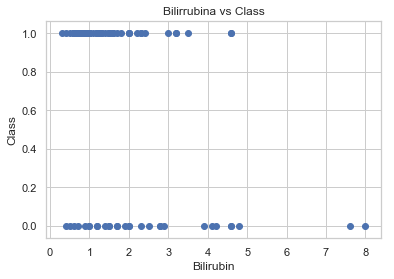

In [105]:
plt.scatter(df_hepatite_novo['Bilirubin'], df_hepatite_novo['Class'])
plt.title('Bilirrubina vs Class')
plt.xlabel('Bilirubin')
plt.ylabel('Class')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002DEA1043780>]],
      dtype=object)

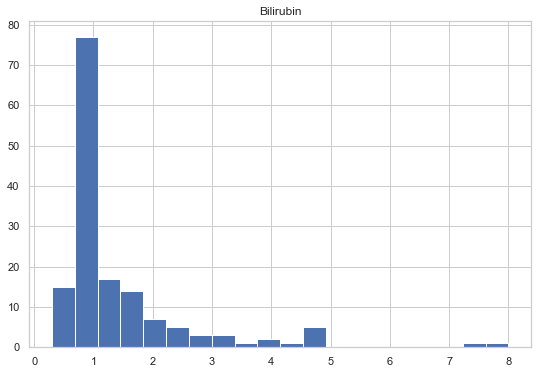

In [52]:
df_hepatite_novo.hist(column = 'Bilirubin', figsize=(9,6), bins=20)

In [53]:
df_hepatite_novo['Bilirubin'].describe()

count    152.000000
mean       1.424123
std        1.202617
min        0.300000
25%        0.775000
50%        1.000000
75%        1.500000
max        8.000000
Name: Bilirubin, dtype: float64

In [54]:
df_hepatite_novo['Age'].describe()

count    152.000000
mean      41.052632
std       12.547546
min        7.000000
25%       32.000000
50%       39.000000
75%       50.000000
max       78.000000
Name: Age, dtype: float64

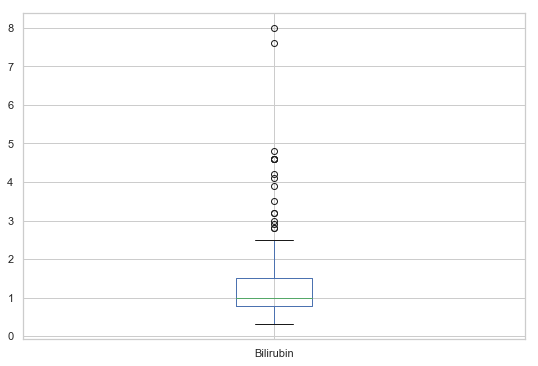

In [110]:
# Verificando outliers para recursos numéricos em nosso conjunto de dados.
# Variável media_nivel_glicose
df_hepatite_novo['Bilirubin'].plot(kind="box", figsize=(9,6))

Considerando que são dados de pacientes com hepatite e que esta doença pode aumentar a concentração de bilirrubina no sangue, os valores extremos podem estar corretos, por isso não irei descartálos.

A fosfatase alcalina é uma enzima presente nas membranas de revestimento dos canalículos biliares (canalicular).

Sua dosagem é geralmente utilizada para o diagnóstico de doenças hepáticas, pois o aumento de seus níveis pode indicar lesão hepática canalicular (colestase, hepatite, etc).

Os valores de referência são os seguintes:

(observação: lembre-se que os valores de referência podem variar dependendo do método e dos reagentes usados. Logo, esses valores devem estar citados nos laudos de resultados dos exames laboratoriais de forma clara).

    Faixa etária	Masculino (U/L)	Feminino (U/L)    Ambos os sexos
    Recém-nascido          --	          --              150 a 600
    6 meses a 9 anos	   --	          --              250 a 900
    10 a 11 anos	    250 a 730      250 a 950              --
    12 a 13 anos	    275 a 875      200 a 730              --
    14 a 15 anos        170 a 970      170 a 460              --
    16 a 18 anos        25  a 720      75  a 270              --
    Acima de 18 anos	   --	          --              50  a 250

Fonte: https://medicoresponde.com.br/busca/?s=fosfatase+alcalina

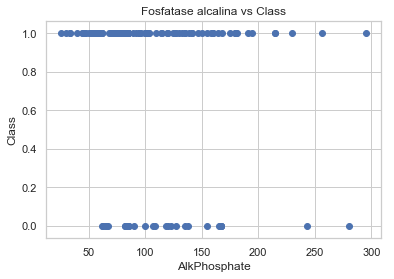

In [106]:
plt.scatter(df_hepatite_novo['AlkPhosphate'], df_hepatite_novo['Class'])
plt.title('Fosfatase alcalina vs Class')
plt.xlabel('AlkPhosphate')
plt.ylabel('Class')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002DEB01E2F60>]],
      dtype=object)

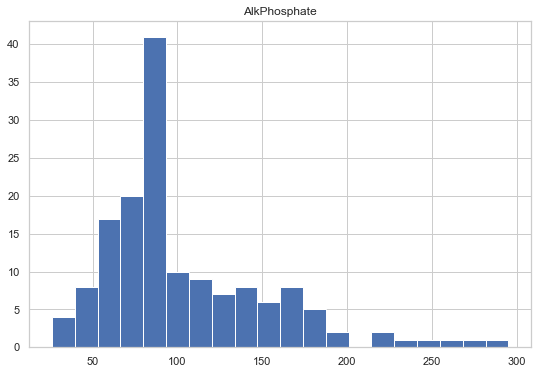

In [56]:
df_hepatite_novo.hist(column = 'AlkPhosphate', figsize=(9,6), bins=20)

In [57]:
df_hepatite_novo['AlkPhosphate'].describe()

count    152.000000
mean     103.598684
std       49.750804
min       26.000000
25%       72.000000
50%       85.000000
75%      127.750000
max      295.000000
Name: AlkPhosphate, dtype: float64

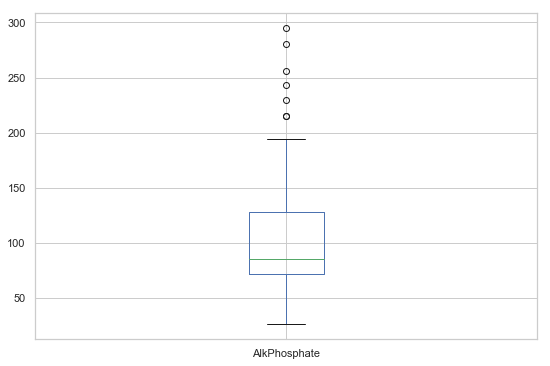

In [118]:
# Verificando outliers para recursos numéricos em nosso conjunto de dados.
# Variável media_nivel_glicose
df_hepatite_novo['AlkPhosphate'].plot(kind="box", figsize=(9,6))

Considerando os valores de referencia podemos perceber que não existem discrepâncias nos dados referentes a fosfatase alcalina.

Transaminase glutâmica oxalacética sérica (SGOT), também conhecido como TGO ou AST, são enzimas encontradas no interior de várias células do corpo.

As enzimas TGO e TGP são indicadores de lesão no fígado. Por isso, o exame de TGO e TGP serve principalmente para avaliar o funcionamento do fígado. Quando os níveis de TGO e TGP estão alterados, pode ser um sinal de lesão nas células hepáticas.

Os valores normais variam de laboratório para laboratório, ficando, porém, o limite superior sempre ao redor de 40 e 50 U/L.

TGO e TGP acima de 160 U/L, indicam doença hepática, com grande probabilidade. Já aumentos acima de 1000 U/L são geralmente causadas por hepatites virais, isquêmica ou por drogas.

Fontes: https://medicoresponde.com.br/o-que-pode-significar-nivel-alto-ou-baixo-de-tgo-e-tgp/

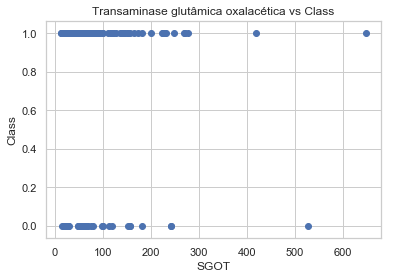

In [107]:
plt.scatter(df_hepatite_novo['SGOT'], df_hepatite_novo['Class'])
plt.title('Transaminase glutâmica oxalacética vs Class')
plt.xlabel('SGOT')
plt.ylabel('Class')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002DEA7E5BCC0>]],
      dtype=object)

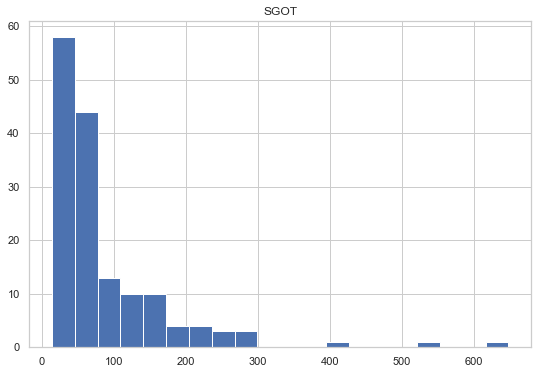

In [59]:
df_hepatite_novo.hist(column = 'SGOT', figsize=(9,6), bins=20)

In [60]:
df_hepatite_novo['SGOT'].describe()

count    152.000000
mean      85.462719
std       89.511634
min       14.000000
25%       31.000000
50%       58.000000
75%      100.250000
max      648.000000
Name: SGOT, dtype: float64

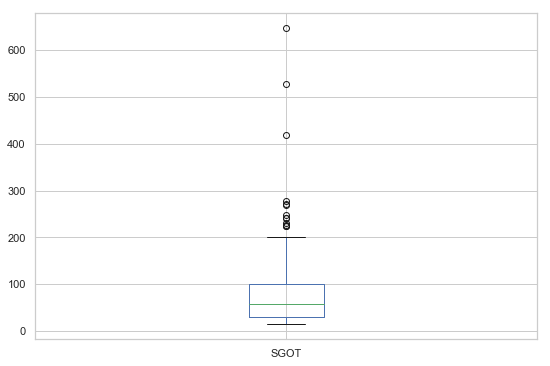

In [119]:
# Verificando outliers para recursos numéricos em nosso conjunto de dados.

df_hepatite_novo['SGOT'].plot(kind="box", figsize=(9,6))

Existem valores discrepantes, porém considerando que são dados de pacientes com hepatite e que esta doença pode aumentar a concentração desta enzima no sangue, os valores extremos podem estar corretos, por isso não irei descartálos.

A albumina é a proteína mais abundante do plasma sanguíneo. Serve como deposito móvel de aminoácidos. Os aumentos de albumina relaciona-se, quase sempre com desidratação, que produz um conseqüente aumento do conteúdo protéico do plasma.

Valores Normais:

    plasma: 3-5 g / 100ml
    Urina: menor de 10 mg/l
    LCR: 10-30 mg / dl.

Valores aumentados: Proteinúria glomerular, quiluria, desidratação.

Valores diminuídos: Queimaduras, síndrome nefrótica, doença de Cushing, má absorção, obstrução intestinal, patologia hepática difusa (cirrose, hepatite crônica ativa), febre reumática, má nutrição, ascite, analbuminemia, etc.

Fonte: https://www.boasaude.com.br/exames-de-rotina/a/3/view/albumina-codigo-amb-4030122-2.html

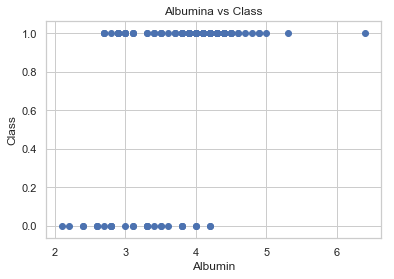

In [108]:
plt.scatter(df_hepatite_novo['Albumin'], df_hepatite_novo['Class'])
plt.title('Albumina vs Class')
plt.xlabel('Albumin')
plt.ylabel('Class')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002DEA3D00EF0>]],
      dtype=object)

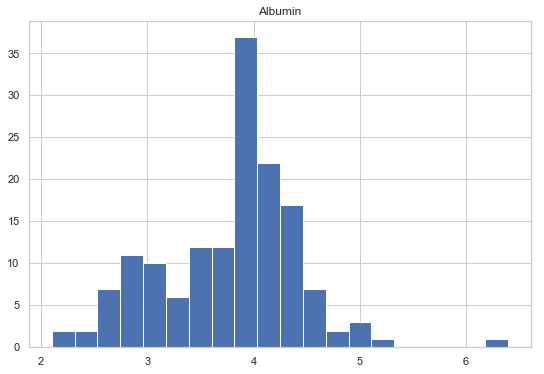

In [62]:
df_hepatite_novo.hist(column = 'Albumin', figsize=(9,6), bins=20)

In [63]:
df_hepatite_novo['Albumin'].describe()

count    152.000000
mean       3.795395
std        0.654110
min        2.100000
25%        3.375000
50%        4.000000
75%        4.200000
max        6.400000
Name: Albumin, dtype: float64

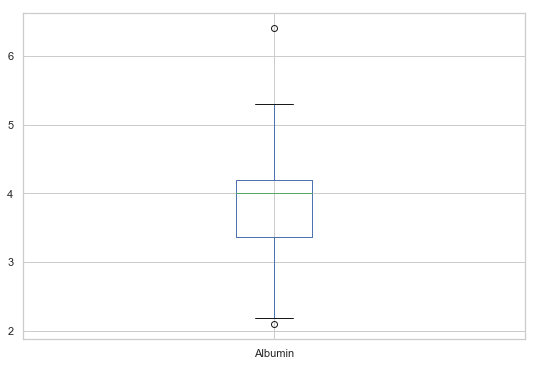

In [120]:
# Verificando outliers para recursos numéricos em nosso conjunto de dados.

df_hepatite_novo['Albumin'].plot(kind="box", figsize=(9,6))

Exame de tempo de protrombina é utilizado sempre que surgem sangramentos ou hematomas frequentes para tentar encontrar a causa do problemtempo de protrombina, o 
tempo de protrombina alto pode está associado a doenças hepáticas.

O Tempo de Protrombina mede o tempo de ocorrência da coagulação, após a adição de tromboplastina tecidual e cálcio ao plasma. Seu valor de referência pode ser expresso em tempo (em torno de 14 segundos) ou em percentual (70-100%).

Fonte: http://rmmg.org/artigo/detalhes/335

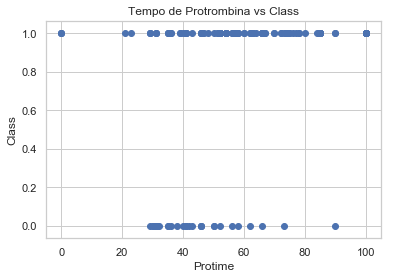

In [109]:
plt.scatter(df_hepatite_novo['Protime'], df_hepatite_novo['Class'])
plt.title('Tempo de Protrombina vs Class')
plt.xlabel('Protime')
plt.ylabel('Class')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002DEA6D96BA8>]],
      dtype=object)

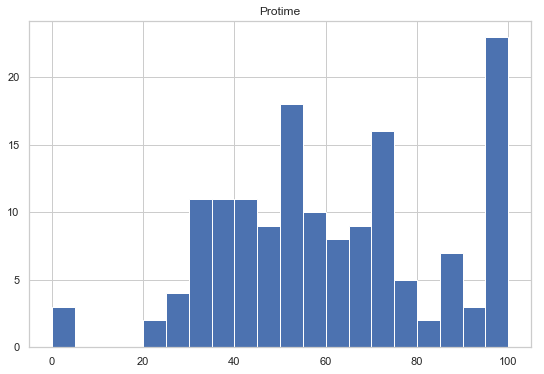

In [65]:
df_hepatite_novo.hist(column = 'Protime', figsize=(9,6), bins=20)

In [66]:
df_hepatite_novo['Protime'].describe()

count    152.000000
mean      60.901316
std       24.297483
min        0.000000
25%       41.000000
50%       58.000000
75%       76.250000
max      100.000000
Name: Protime, dtype: float64

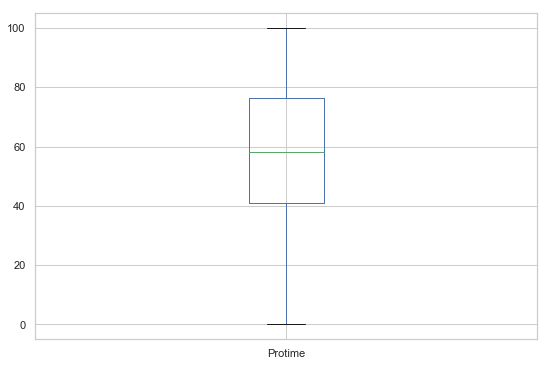

In [121]:
# Verificando outliers para recursos numéricos em nosso conjunto de dados.

df_hepatite_novo['Protime'].plot(kind="box", figsize=(9,6))






## Implmentando o modelo de classificação

In [68]:
# Divisão dos dados em X e Y

X = df_hepatite_novo.loc[:, df_hepatite_novo.columns != 'Class']
Y = df_hepatite_novo['Class']

In [69]:
# Padronização dos dados
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_stand = X.copy()

# numerical features
num_cols = ['Age', 'Bilirubin','AlkPhosphate','SGOT','Albumin','Protime']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_stand[[i]])
    
    # transform the training data column
    X_stand[i] = scale.transform(X_stand[[i]])
    

In [70]:
X_stand.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 154
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 152 non-null    float64
 1   Bilirubin           152 non-null    float64
 2   AlkPhosphate        152 non-null    float64
 3   SGOT                152 non-null    float64
 4   Albumin             152 non-null    float64
 5   Protime             152 non-null    float64
 6   Gender_1.0          152 non-null    uint8  
 7   Gender_2.0          152 non-null    uint8  
 8   Steroid_1.0         152 non-null    uint8  
 9   Steroid_2.0         152 non-null    uint8  
 10  Antivirals_1.0      152 non-null    uint8  
 11  Antivirals_2.0      152 non-null    uint8  
 12  Fatigue_1.0         152 non-null    uint8  
 13  Fatigue_2.0         152 non-null    uint8  
 14  Malaise_1.0         152 non-null    uint8  
 15  Malaise_2.0         152 non-null    uint8  
 16  Anorexia

A Eliminação Recursiva de Recursos (RFE),  remove recursivamente os recursos, cria um modelo usando os atributos restantes e calcula a precisão do modelo. O RFE é capaz de calcular a combinação de atributos que melhor contribuem para a previsão na variável de destino (ou classe). No conjunto de dados em questão o melhor estimador foi o DecisionTreeRegressor.

In [71]:
# Eliminação Recursiva de Recursos 

ModeloRFE = DecisionTreeRegressor()

rfe = RFE(ModeloRFE)
rfe = rfe.fit(X_stand, Y.ravel())
rfe.transform(X_stand)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True False  True False False  True False
 False False  True False False False False False  True  True  True  True
  True False False  True False False  True False]
[ 1  1  1  1  1  1  2  1 11 15  1  4 13  7  1 17 16 14 12 10  1  1  1  1
  1  8  3  1  6  9  1  5]


In [72]:
sorted_features=pd.DataFrame(list(zip(X_stand.columns,rfe.support_)), columns = ['coluna','rfe']).sort_values(by='rfe',ascending=False)
print(sorted_features)

                coluna    rfe
0                  Age   True
20       LiverFirm_1.0   True
22  SpleenPalpable_1.0   True
23  SpleenPalpable_2.0   True
1            Bilirubin   True
24         Spiders_1.0   True
14         Malaise_1.0   True
27         Ascites_2.0   True
10      Antivirals_1.0   True
7           Gender_2.0   True
30       Histology_1.0   True
5              Protime   True
4              Albumin   True
3                 SGOT   True
2         AlkPhosphate   True
21       LiverFirm_2.0   True
28         Varices_1.0  False
29         Varices_2.0  False
26         Ascites_1.0  False
25         Spiders_2.0  False
16        Anorexia_1.0  False
19        LiverBig_2.0  False
18        LiverBig_1.0  False
17        Anorexia_2.0  False
15         Malaise_2.0  False
13         Fatigue_2.0  False
12         Fatigue_1.0  False
11      Antivirals_2.0  False
9          Steroid_2.0  False
8          Steroid_1.0  False
6           Gender_1.0  False
31       Histology_2.0  False


In [73]:
X_rfe = X_stand[sorted_features.coluna[sorted_features['rfe'] == True]]

In [124]:
sorted_features.coluna[sorted_features['rfe'] == True]

0                    Age
20         LiverFirm_1.0
22    SpleenPalpable_1.0
23    SpleenPalpable_2.0
1              Bilirubin
24           Spiders_1.0
14           Malaise_1.0
27           Ascites_2.0
10        Antivirals_1.0
7             Gender_2.0
30         Histology_1.0
5                Protime
4                Albumin
3                   SGOT
2           AlkPhosphate
21         LiverFirm_2.0
Name: coluna, dtype: object

In [74]:
# Parâmetros para a divisão dos dados em treino e teste
seed = 42
test_size = 0.27

In [75]:
# Divisão dos dados em treino e teste
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X_rfe, Y, test_size = test_size, random_state = seed, stratify=Y)

## Oversampling usando SMOTE

Agora vamos aplicar um oversampling para corrigir um viés no conjunto de dados original, empregando Synthetic Minority Over-sampling Technique para balancear os dados.

In [76]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42, ratio='auto')
X_treino, y_treino = smt.fit_sample(X_treino.values, y_treino.values)

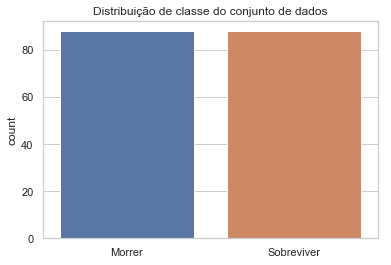

In [77]:
sns.set(style="whitegrid")

#Usando um gráfico de barras para mostrar a distribuição das classes: ativado e não-ativado
bp = sns.countplot(x=y_treino)
plt.title("Distribuição de classe do conjunto de dados")
bp.set_xticklabels(["Morrer","Sobreviver"])
plt.show()

In [78]:
X_treino.shape

(176, 16)

In [79]:
X_teste.shape

(42, 16)

In [80]:
y_treino.shape

(176,)

In [81]:
y_teste.shape

(42,)

## Criando o Classificador

In [82]:
# Cria o classificador
modelo = LogisticRegression(C=1, solver='lbfgs',max_iter=300, penalty="l2")

# Treina e cria o modelo
modelo.fit(X_treino, y_treino)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
# Previsões com dados de teste
y_pred = modelo.predict(X_teste)
y_pred_proba = modelo.predict_proba(X_teste)[:,1]

## Avaliando a performance do modelo

In [84]:
acc_RF = accuracy_score(y_teste, y_pred)*100
print('Acurácia: (%): \n',acc_RF)
      

fpr1 , tpr1, _ = roc_curve(y_teste, y_pred)
auc_RF = auc(fpr1, tpr1)*100
print("AUC (%): \n", auc_RF)

pre_RF = precision_score(y_teste, y_pred)
print('Precision Score (%): \n',pre_RF*100 )
rec_RF = recall_score(y_teste, y_pred)
print('Recall Score (%): \n', rec_RF*100)

Acurácia: (%): 
 90.47619047619048
AUC (%): 
 94.11764705882352
Precision Score (%): 
 100.0
Recall Score (%): 
 88.23529411764706


In [85]:
y_pred.shape

(42,)

C:\Users\anton\Anaconda3\envs\PLN\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
C:\Users\anton\Anaconda3\envs\PLN\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)


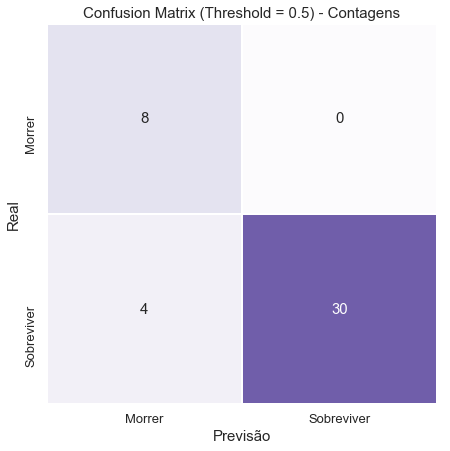

In [86]:
# Visualizando a Confusion Matrix
cm = confusion_matrix(y_teste, y_pred)
#put it into a dataframe
cm_df = pd.DataFrame(cm)

#plot CM
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(pd.DataFrame(cm_df), annot=True, annot_kws={"size": 15}, cmap="Purples", vmin=0, vmax=42, fmt='.0f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=["Morrer","Sobreviver"], yticklabels=["Morrer","Sobreviver"])
plt.xlabel("Previsão", fontsize=15)
plt.ylabel("Real", fontsize=15)
ax.set_xticklabels(["Morrer","Sobreviver"], fontsize=13)
ax.set_yticklabels(["Morrer","Sobreviver"], fontsize=13)
plt.title("Confusion Matrix (Threshold = 0.5) - Contagens", fontsize=15)
plt.show()

C:\Users\anton\Anaconda3\envs\PLN\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
C:\Users\anton\Anaconda3\envs\PLN\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)


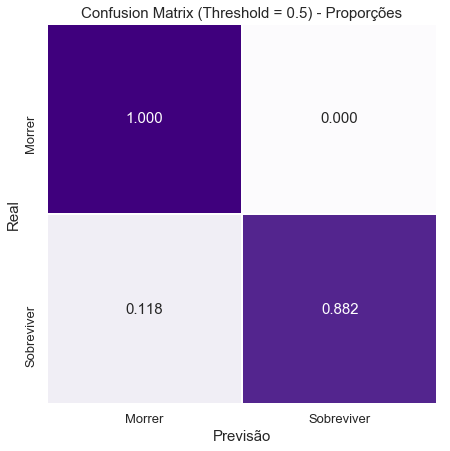

In [87]:
# Visualizando proporcinalmente a Confusion Matrix

# convertendo contagens em proporções
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

cm_df = pd.DataFrame(cm)
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(pd.DataFrame(cm_df), annot=True, annot_kws={"size": 15}, cmap="Purples", vmin=0, vmax=1, fmt='.3f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=["Morrer","Sobreviver"], yticklabels=["Morrer","Sobreviver"])
plt.xlabel("Previsão", fontsize=15)
plt.ylabel("Real", fontsize=15)
ax.set_xticklabels(["Morrer","Sobreviver"], fontsize=13)
ax.set_yticklabels(["Morrer","Sobreviver"], fontsize=13)
plt.title("Confusion Matrix (Threshold = 0.5) - Proporções", fontsize=15)

plt.show()

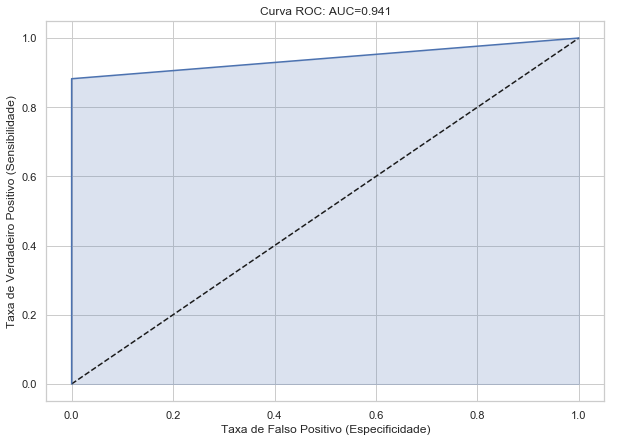

In [88]:
# Visualizando a curva ROC

fpr, tpr, thresholds = roc_curve(y_teste, y_pred)

fig, ax = plt.subplots(figsize = (10,7))
#plotting the "guessing" model
plt.plot([0, 1], [0, 1], 'k--')
#plotting the logistic model
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, alpha=0.2, color='b')
plt.xlabel('Taxa de Falso Positivo (Especificidade)')
plt.ylabel('Taxa de Verdadeiro Positivo (Sensibilidade)')
plt.title('Curva ROC: AUC={0:0.3f}'.format(roc_auc_score(y_teste,y_pred)))
plt.show()

In [89]:
print(y_pred_proba)

[0.29666235 0.86400841 0.00486226 0.8933616  0.97470151 0.6876461
 0.72067575 0.95987211 0.5363278  0.95728332 0.18706525 0.73876544
 0.94815056 0.92020662 0.92751764 0.8356402  0.97276458 0.95238447
 0.90245979 0.09980561 0.07094785 0.40802613 0.95586651 0.92084447
 0.94813893 0.11793391 0.87668289 0.52933669 0.96173438 0.96281539
 0.15603104 0.02197506 0.97655416 0.96873661 0.98472262 0.72195
 0.10402598 0.58830574 0.11819475 0.07167486 0.98661123 0.9981193 ]


In [90]:
print(y_pred)
print(y_teste.values)

[0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0
 1 0 0 1 1]
[1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 0 0 1 1]


In [91]:
#generating a report to extract the measure of interest using built-in sklearn function
print(classification_report(y_teste,y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         8
           1       1.00      0.88      0.94        34

    accuracy                           0.90        42
   macro avg       0.83      0.94      0.87        42
weighted avg       0.94      0.90      0.91        42



## Conclusão

Mediante as características dos atributos disponibilizados no conjunto de dados e o objetivo proposto nesse trabalho, o modelo se comporta muito bem. Quando analisamos nossa classe positiva, ele atinge uma precisão de 100%, isso quer dizer que houve zero ocorrência de falso positivo, ou seja, no conjunto de dados de teste, todos os casos em que o modelo classificou como paciente sobreviver, o modelo acertou. Podemos aplicar este modelo em novos dados para obter as probabilidades para cada classe e assim encontrar a probabilidade de sobrevivência.

# Fim